In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ustawia domyślną wielkość wykresów
plt.rcParams['figure.figsize'] = (8,6)
# to samo tylko dla tekstu
plt.rcParams['font.size'] = 16
# ustawia wielkość tekstów dla wykresów seaborn zależną od wielkości wykresu
sns.set_context('paper', font_scale=1.4)

In [2]:
data = pd.read_csv("students.csv", sep=",")

In [3]:
#Brak braków danych, 1044 obserwacje
# 34 zmienne

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In [5]:
#studenci w wieku 15-22 lat
#w większości blisko szkoły
#w dużej większości zdający i nie opuszczający szkoły

In [6]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [7]:
#W danych są zmienne binarne (płeć) nominalne (school) uporządkowane (fedu) zliczenia (age) ilorazowe i przedziałowe (G1)

In [8]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'class'],
      dtype='object')

In [9]:
#G1, G2, G3 ~ Normalne

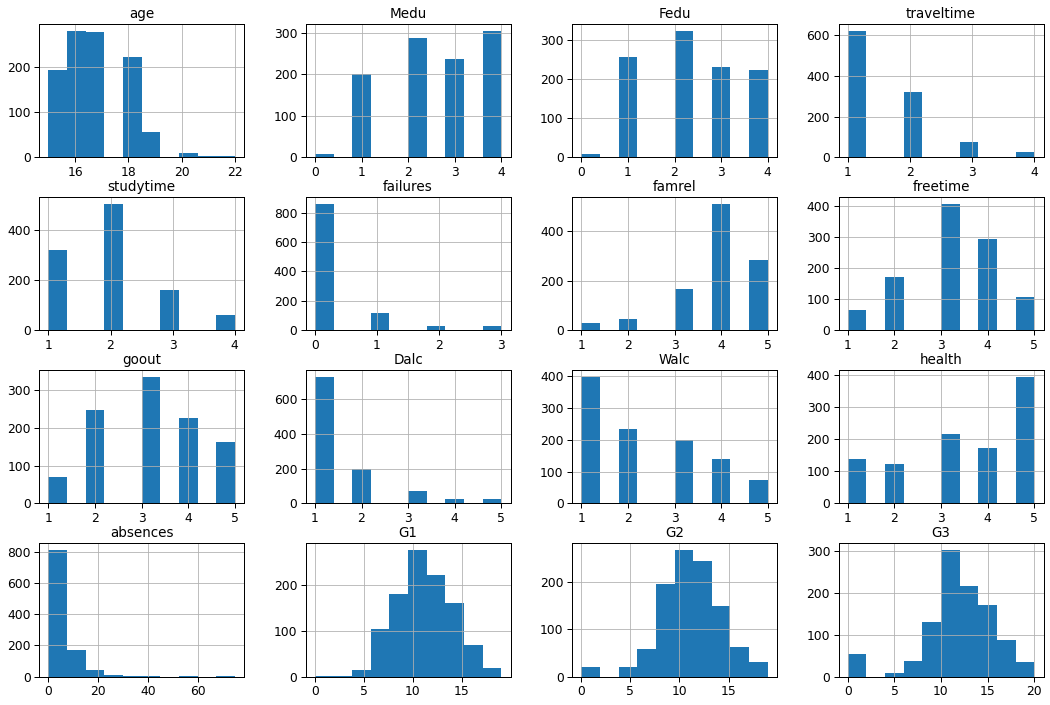

In [10]:
data.hist(figsize=(18, 12))

plt.show()

In [11]:
# widać że więcej czasu spędzonego na nauce daje większe wyniki

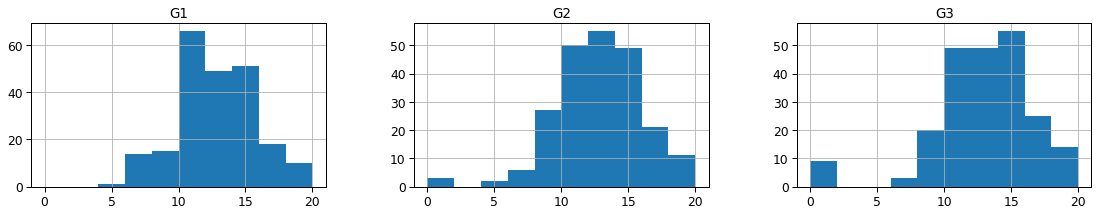

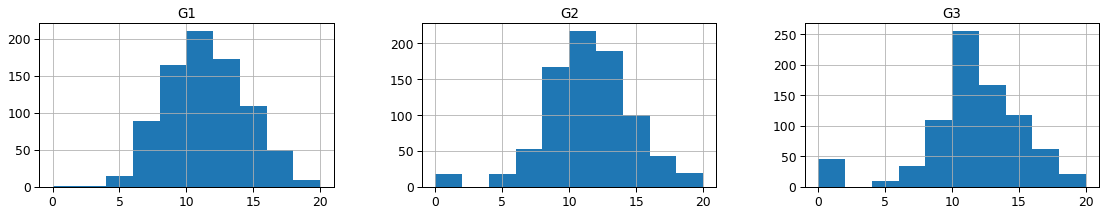

In [12]:
data.loc[data['studytime'] >2][['G1','G2','G3']].hist(figsize=(19, 3), range=(0, 20), layout=(1,3)) 
data.loc[data['studytime'] <=2][['G1','G2','G3']].hist(figsize=(19, 3), range=(0, 20), layout=(1,3))
plt.show()

In [13]:
#Wyniki semestralne są znacząco skorelowane, co znaczy że studenci mają podobe (sobie) wyniki w trakcie semestrów
#Dodatkowo spożycie alkoholu w tygodniu i w weekendzie jak i częstość wychodzenia ze znajomymi 
#jest średnio skorelowana co jest całkiem logiczne
#Liczba niezaliczeń ma negatywny wpływ na ocene semestru (duh)
#Edukacja matki i ojca są znacząco skorelowane. Dobierają się odpowiednio

<AxesSubplot:>

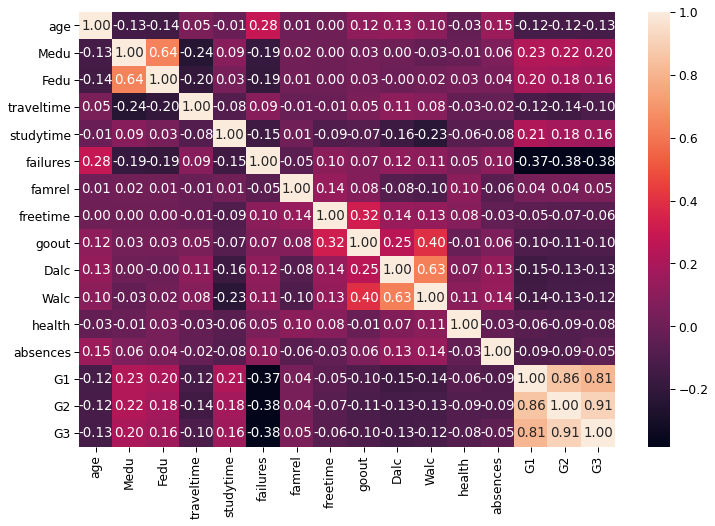

In [14]:
plt.figure(figsize=(12,8))
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, fmt=".2f")

<AxesSubplot:xlabel='failures', ylabel='G1'>

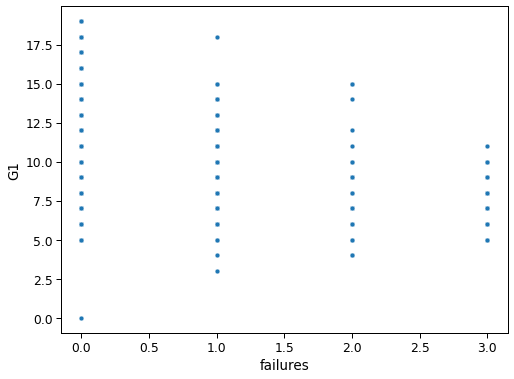

In [15]:
sns.scatterplot(data=data, x = "failures", y = "G1")